## Datenaufbereitung

### Author: Sangeeths Chandrakumar

### Importieren der benötigten Bibliotheken

In [109]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

### Laden der Daten

In [110]:
heart_data = pd.read_csv('heart.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Eiblick in die Daten

In [111]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Fehlende Werte

In [112]:
# Check for missing values
missing_values = heart_data.isnull().sum()
missing_values[missing_values > 0]  # Zeigt nur Spalten mit fehlenden Werten an

Series([], dtype: int64)

Der Datensatz enthält keine fehlenden Werte, daher ist keine Auffüllung notwendig.

### Umwandlung kategorischer Werte in numerische Werte


Einige der Spalten im Datensatz sind kategorische Variablen (cp, restecg, slope, thal). Diese müssen in numerische Werte umgewandelt werden, um sie in maschinellen Lernmodellen verwenden zu können, da die meisten Algorithmen mit numerischen Daten arbeiten. Wir können Techniken wie One-Hot-Encoding oder Label-Encoding verwenden, abhängig von der Natur der Daten:

One-Hot-Encoding wird verwendet, wenn die kategorischen Werte keine ordinale Beziehung haben. Dabei wird jede Kategorie als eine separate binäre Spalte dargestellt.
Label-Encoding kann verwendet werden, wenn die Kategorien eine ordinale Beziehung haben (z.B. niedrig, mittel, hoch).

Lassen Sie uns die Verteilung dieser kategorischen Variablen überprüfen und entscheiden, welche Technik angewendet werden sollte.​

In [113]:
# Überprüfung der einzigartigen Werte in den kategorischen Spalten
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
unique_values = {col: heart_data[col].unique() for col in categorical_columns}
unique_values

{'cp': array([0, 1, 2, 3], dtype=int64),
 'restecg': array([1, 0, 2], dtype=int64),
 'slope': array([2, 0, 1], dtype=int64),
 'thal': array([3, 2, 1, 0], dtype=int64)}

Da keine dieser Variablen eine klare ordinale Beziehung aufweist (zum Beispiel niedrig, mittel, hoch), ist es am besten, One-Hot-Encoding anzuwenden. Dies verhindert, dass das Modell irrtümlich eine Ordnung oder Distanz zwischen den Kategorien annimmt, die nicht existiert.

Ich werde nun One-Hot-Encoding für diese Variablen anwenden.​

In [114]:
# Anwenden von One-Hot-Encoding auf kategorische Spalten
heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_columns)

# Anzeigen der ersten paar Zeilen des umgewandelten Datensatzes
heart_data_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


In [115]:
heart_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1025 non-null   int64  
 4   fbs        1025 non-null   int64  
 5   thalach    1025 non-null   int64  
 6   exang      1025 non-null   int64  
 7   oldpeak    1025 non-null   float64
 8   ca         1025 non-null   int64  
 9   target     1025 non-null   int64  
 10  cp_0       1025 non-null   uint8  
 11  cp_1       1025 non-null   uint8  
 12  cp_2       1025 non-null   uint8  
 13  cp_3       1025 non-null   uint8  
 14  restecg_0  1025 non-null   uint8  
 15  restecg_1  1025 non-null   uint8  
 16  restecg_2  1025 non-null   uint8  
 17  slope_0    1025 non-null   uint8  
 18  slope_1    1025 non-null   uint8  
 19  slope_2    1025 non-null   uint8  
 20  thal_0  

### Anpassung numerischer Werte

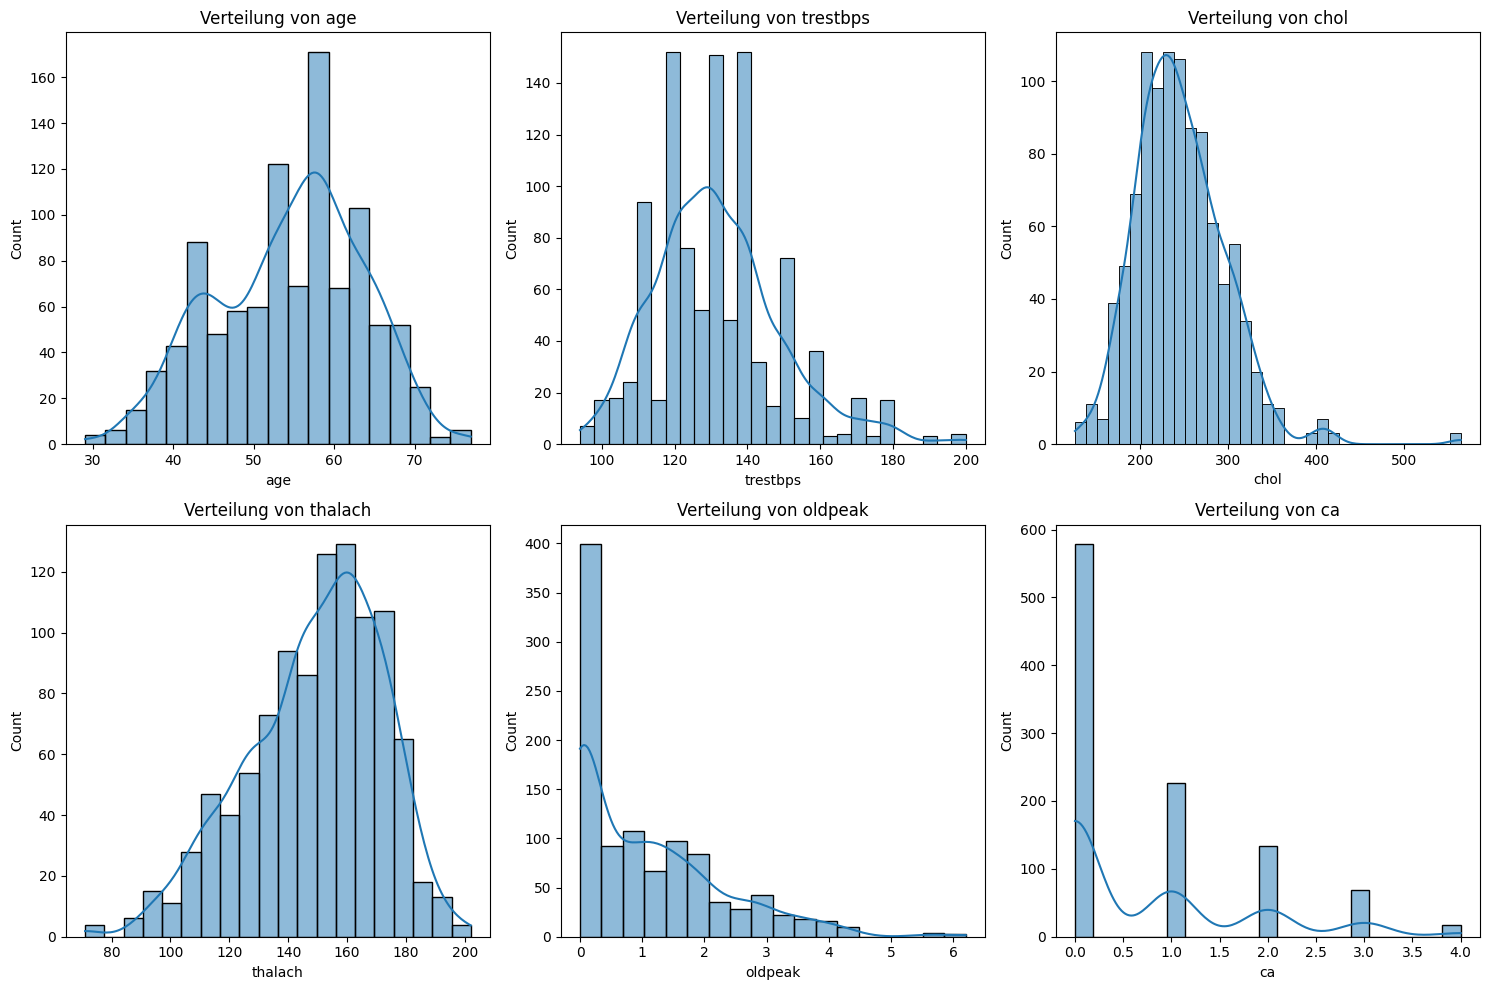

,age,trestbps,chol,thalach,oldpeak,ca
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


In [116]:
# Statistische Zusammenfassung der numerischen Variablen
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
heart_data_numerical_summary = heart_data[numerical_columns].describe()

# Erstellung von Histogrammen für die numerischen Variablen
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart_data[col], kde=True)
    plt.title(f'Verteilung von {col}')
plt.tight_layout()
plt.show()

heart_data_numerical_summary


## Skalierung der Daten

Eine Möglichkeit, mit diesen Ausreißern und Schiefheiten umzugehen, ist die Anwendung einer Logarithmus- oder Wurzeltransformation. Solche Transformationen können helfen, die Datenverteilungen symmetrischer zu gestalten und die Auswirkungen von Ausreißern zu mindern. Allerdings ist es wichtig, dass keine negativen oder Nullwerte in den Daten vorhanden sind, bevor solche Transformationen angewendet werden.

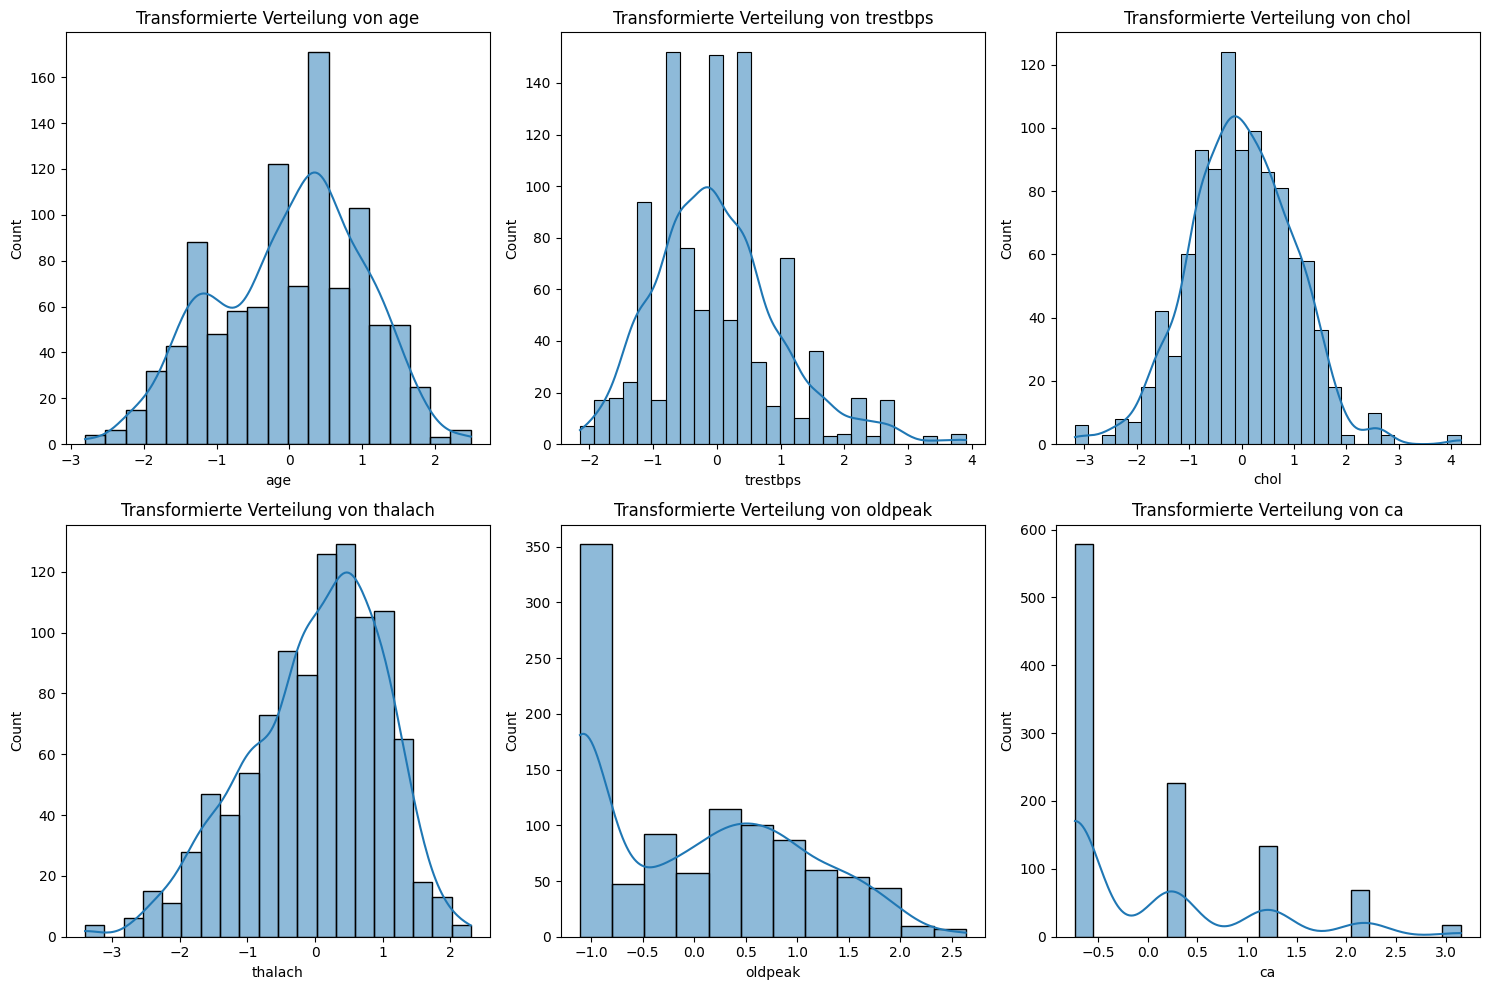

,age,trestbps,chol,thalach,oldpeak,ca
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,-7.036106e-16,-1.277244e-15,-4.332578e-16,8.491852e-17,1.819683e-17
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-2.148237e+00,-3.179714e+00,-3.397080e+00,-1.107114e+00,-7.319715e-01
25%,-7.095548e-01,-6.632165e-01,-6.516905e-01,-7.442713e-01,-1.107114e+00,-7.319715e-01
50%,1.726817e-01,-9.205458e-02,-1.913768e-02,1.255019e-01,6.898234e-03,-7.319715e-01
75%,7.240794e-01,4.791073e-01,6.498913e-01,7.343432e-01,8.442890e-01,2.386246e-01
max,2.488552e+00,3.906079e+00,4.184516e+00,2.299935e+00,2.634295e+00,3.150413e+00


In [117]:


# Logarithmische Transformation für 'chol' und 'oldpeak'
heart_data_transformed = heart_data.copy()
heart_data_transformed['chol'] = np.log1p(heart_data_transformed['chol'])
heart_data_transformed['oldpeak'] = np.log1p(heart_data_transformed['oldpeak'])

# Standardisierung der numerischen Variablen
scaler = StandardScaler()
heart_data_transformed[numerical_columns] = scaler.fit_transform(heart_data_transformed[numerical_columns])

# Überprüfung der transformierten Daten
transformed_numerical_summary = heart_data_transformed[numerical_columns].describe()

# Erstellung von Histogrammen für die transformierten numerischen Variablen
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart_data_transformed[col], kde=True)
    plt.title(f'Transformierte Verteilung von {col}')
plt.tight_layout()
plt.show()

transformed_numerical_summary


Die Transformation und Standardisierung der numerischen Variablen wurden erfolgreich durchgeführt. Die Histogramme zeigen jetzt, dass die Verteilungen symmetrischer sind und die Ausreißer weniger Einfluss haben.